# 나랑 닮은 연예인을 찾아보자

In [1]:
# 필요 module import
import os
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# directory의 file list 불러오기
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/actor'
file_list = os.listdir(dir_path)
print ("file_list: {}".format(file_list))

file_list: ['김민재.jpeg', '김법래.jpeg', '레인보우재경.jpg', '김진수.jpeg', '여욱환.jpeg', '김상호.png', '제프리 힌턴.jpg', '이대호.jpeg', '아이즈원김채원.jpg', '제이콥 배털론.jpg', '이일민.jpeg', '유오성.jpeg', '시우민.jpg', '김경진.png', '이훈.jpeg', '이태성.jpeg', '곽희성.jpeg', '김준.jpeg', '손흥민.jpg', '권현빈.jpg', '손예진.jpeg', '김혜성.jpeg', '유노윤호.jpeg', '송중기.jpeg', '이상엽.jpeg', 'biden.jpg', '류수영.jpeg', '강이석.png', '박용우.jpeg', '온앤오프라운.jpg', '윤종훈.jpeg', '안재환.jpeg', '안재욱.jpeg', '박해수.jpeg', '박성호.jpg', '고인범.jpeg', '오재무.jpeg', '임지규.png', '김명준.jpeg', '김선호.jpeg', '조정치.jpg', '박광현.png', '김이안.jpeg', '이명박.jpg', '온앤오프와이엇.jpg', '김도윤.jpeg', '지수.jpg', '유재석.jpg', '이정재.jpeg', '윤주상.jpeg', '이효리.jpg', '김인권.jpeg', '양현민.jpeg', '황병국.jpg', '김성민.jpeg', '문재인.jpeg', '김갑수.jpeg', '김범.jpeg', '권해효.jpeg', '양동근.jpeg', '이학주.jpeg', '고우림.jpeg', '고창석.jpeg', '고경표.jpeg', '이규복.jpeg', '이석준.jpeg', '이승환.jpg', '안재현.jpeg', '오현경.jpeg', '류경수.jpeg', '슈퍼비.jpeg', '오광록.jpeg', '이말년.png', '류승범.jpeg', '봉준호.jpg', '이진호.jpeg', '방시혁.jpeg', '연준석.jpeg', '김수로.png', '윤종신.jpeg', '안내상.jpeg', '백도빈.jpeg', '장도연.jpg',

In [3]:
# 얼굴 영역만 잘라서 출력하는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if face_locations:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
    else:
        return []

In [4]:
# 임베딩 벡터 구하기
image_file = os.path.join(dir_path, '내사진.jpg')
cropped_face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

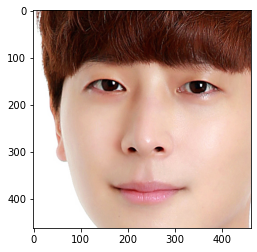

In [5]:
# 이미지 확인
%matplotlib inline

plt.imshow(cropped_face)

In [6]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(cropped_face)  
embedding

[array([-0.04162308,  0.07661512, -0.03347172, -0.0439301 , -0.17058283,
        -0.00428921, -0.13133562, -0.08782402,  0.07665628, -0.08880419,
         0.17541419, -0.0491553 , -0.197714  , -0.02211577, -0.06971261,
         0.15728484, -0.15970841, -0.18108232, -0.00943352,  0.00763343,
         0.10314555,  0.08039663, -0.02645194,  0.05429447, -0.13053222,
        -0.25747818, -0.08635049, -0.07763084,  0.06958009, -0.06917927,
        -0.10626687, -0.00300992, -0.19636515, -0.02339798,  0.09511147,
         0.10235816,  0.01866815, -0.10627249,  0.14613807,  0.02634595,
        -0.27303091,  0.08236273,  0.07000127,  0.20217539,  0.17578548,
        -0.0119524 ,  0.0213309 , -0.17780475,  0.10271174, -0.09865228,
         0.05159209,  0.18599999,  0.13483115,  0.05243032, -0.02082676,
        -0.14851242,  0.03630633,  0.1183828 , -0.14779505,  0.01945739,
         0.12066279,  0.04214192,  0.01400208, -0.10245301,  0.17452379,
         0.03294039, -0.1052251 , -0.26861998,  0.1

In [7]:
# embedding dict 만드는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            # splitext = file, extension
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face
            
    return embedding_dict, cropped_dict

In [8]:
# embedding_dict 만들기
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)
embedding_dict['내사진']

/home/ssac10/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


array([-0.04162308,  0.07661512, -0.03347172, -0.0439301 , -0.17058283,
       -0.00428921, -0.13133562, -0.08782402,  0.07665628, -0.08880419,
        0.17541419, -0.0491553 , -0.197714  , -0.02211577, -0.06971261,
        0.15728484, -0.15970841, -0.18108232, -0.00943352,  0.00763343,
        0.10314555,  0.08039663, -0.02645194,  0.05429447, -0.13053222,
       -0.25747818, -0.08635049, -0.07763084,  0.06958009, -0.06917927,
       -0.10626687, -0.00300992, -0.19636515, -0.02339798,  0.09511147,
        0.10235816,  0.01866815, -0.10627249,  0.14613807,  0.02634595,
       -0.27303091,  0.08236273,  0.07000127,  0.20217539,  0.17578548,
       -0.0119524 ,  0.0213309 , -0.17780475,  0.10271174, -0.09865228,
        0.05159209,  0.18599999,  0.13483115,  0.05243032, -0.02082676,
       -0.14851242,  0.03630633,  0.1183828 , -0.14779505,  0.01945739,
        0.12066279,  0.04214192,  0.01400208, -0.10245301,  0.17452379,
        0.03294039, -0.1052251 , -0.26861998,  0.13164108, -0.19

In [9]:
# 두 얼굴 사이의 거리 구하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [10]:
# 내 사진으로 비교
get_distance('내사진','내사진1')

0.34675699693614737

In [11]:
# name1과 name2의 거리를 비교하는 함수
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [12]:
# 거리를 비교할 name1 미리 지정
sort_key_func = get_sort_key_func('내사진')

In [13]:
# 순위에 맞는 이미지 출력
def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 1)
    plt.imshow(cropped_dict[sorted_faces[0][0]])
    for i in range(1, top+1):
        fig.add_subplot(2, top, i+5)
        plt.imshow(cropped_dict[sorted_faces[i][0]])

In [14]:
# 가장 닮은 꼴 찾기
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print(f'순위 {i} : 이름 ({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])})')
    return sorted_faces

In [15]:
# 순위 출력
sorted_faces = get_nearest_face('내사진')

순위 1 : 이름 (강봉성), 거리(0.316683287325997)
순위 2 : 이름 (내사진1), 거리(0.34675699693614737)
순위 3 : 이름 (김민석), 거리(0.3576134226313578)
순위 4 : 이름 (이재균), 거리(0.3627864791016433)
순위 5 : 이름 (김진엽), 거리(0.36733970230729596)


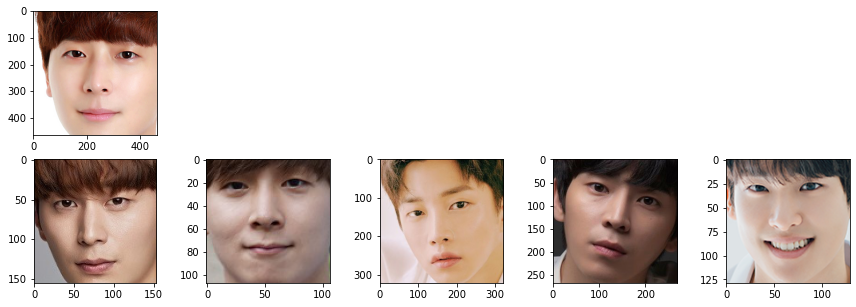

In [16]:
# 순위에 따른 이미지 출력
get_nearest_face_images(sorted_faces)

# 회고록

- 임베딩이란 개념에 대해 지난 번에 한번 학습했었던 경험이 있다보니 이번 과제의 난이도가 조금 덜 어렵게 느껴진다.
- 고차원을 가지는 이미지를 저차원에서 시각화 하는 개념에 대해 조금 생소하게 느껴졌지만 tensowflow의 Projector로 확인해보니 바로 이해할 수 있었다.
- 한 사람에 한 장의 이미지 만으로는 아무래도 닮은 정도를 비교하기 어려운 것 같다. 나랑 거리가 가까운 연예인이라고 나온 결과를 내 사진과 비교해 보니 전혀 아닌듯 ㅎ...
- 오늘은 혼자서 matplotlib을 이용하여 결과를 조금 더 보기 좋게 꾸며봤다.
- 혹시나 해서 한국 연예인 얼굴 사진 Dataset이 있는지 찾아봤는데 보이질 않았다. 내가 못 찾는건지, 아니면 초상권 등으로 인해서 없는건지...
- 오늘 진행한 과제는 따로 학습하거나 하는 과정이 크게 없어서 빠르게 진행할 수 있었다.